### Import configuration and data.

In [1]:
%cd ..

/home/xlluo/hdd/ML-fracture


In [2]:
%load_ext autoreload
%autoreload 2

from src.core.trainer import *

trainer = load_trainer(path='output/SNL_MSU_DOE_avg_fatigue/2022-12-02-19-05-49_base_SNL_MSU_DOE_avg_fatigue/trainer.pkl')

### S-N curve

In [4]:
trainer.get_material_code(unique=True)

,Material_Code,Count
0,Biax-CH13-UP2[±45/0/±45]S,12
1,Biax-CH14-UP2[±45/0/±45]S,11
2,Biax-CH15-UP2[±45/0/±45]S,9
3,Biax-CH16-UP2[±45/0/±45]S,13
4,Biax-CH17-UP2[±45/0/±45]S,13
...,...,...
151,UNI-PPGHYBON2400-VE4[0],3
152,UNI-PPGHYBON2400-VE5[0]4,3
153,UNI-PPGHYBON2400-VE6[0]4,2
154,UNI-PPGHYBON4400-VE4[0],8


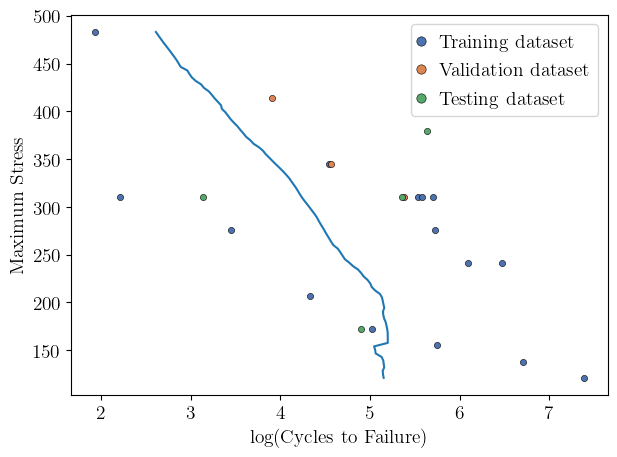

In [6]:
trainer.plot_S_N(s_col='Maximum Stress', n_col='log(Cycles to Failure)', m_code='MD-DD5P-UP2[0/±45/0]S')

In [5]:
trainer._select_by_material_code(code='Biax-CH2-UP2[(±45/0/±45)]S', partition='train')

Int64Index([419, 421, 417, 414, 416, 411, 423, 415, 422], dtype='int64')

In [3]:
trainer.feature_data

,Percentage of Fibre in 0-deg Direction,Percentage of Fibre in 45-deg Direction,Percentage of Fibre in 90-deg Direction,Percentage of Fibre in Other Direction,Absolute Maximum Stress,Absolute Peak-to-peak Stress,Frequency,Fibre Volumn Fraction,Relative Maximum Stress,Relative Peak-to-peak Stress,Thickness,Static Maximum Tensile Stress,Static Maximum Tensile Strain,Static Elastic Modulus,0-deg layers,45-deg layers,90-deg layers
0,0.420300,-0.222910,-0.374018,-0.384554,0.369708,-0.200208,1.913594,0.317494,8.363252e-08,-9.345248e-08,-0.947559,5.768402e-08,0.783262,0.273189,0.494388,-0.224725,-0.108035
1,0.420300,-0.222910,-0.374018,-0.384554,0.866392,0.670445,-0.108064,0.317494,8.363252e-08,-9.345248e-08,-0.947559,5.768402e-08,0.783262,0.273189,0.494388,-0.224725,-0.108035
2,0.420300,-0.222910,-0.374018,-0.384554,1.237106,1.320281,-0.310230,0.317494,8.363252e-08,-9.345248e-08,-0.947559,5.768402e-08,0.783262,0.273189,0.494388,-0.224725,-0.108035
3,0.420300,-0.222910,-0.374018,-0.384554,0.618050,0.235119,0.902765,0.317494,8.363252e-08,-9.345248e-08,-0.947559,5.768402e-08,0.783262,0.273189,0.494388,-0.224725,-0.108035
4,0.420300,-0.222910,-0.374018,-0.384554,0.121365,-0.635535,1.913594,0.317494,8.363252e-08,-9.345248e-08,-0.947559,5.768402e-08,0.783262,0.273189,0.494388,-0.224725,-0.108035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,1.122126,-1.256916,1.104922,-0.384554,1.114734,1.105772,-0.714561,1.129385,1.365165e-01,-2.330782e-02,-1.606901,1.044291e+00,-0.354104,1.793429,-0.785656,-1.353420,-0.108035
1232,1.122126,-1.256916,1.104922,-0.384554,0.866392,0.670445,-0.714561,1.282874,-2.854230e-01,-4.289709e-01,-1.656649,1.044291e+00,-0.354104,1.793429,-0.785656,-1.353420,-0.108035
1233,1.122126,-1.256916,1.104922,-0.384554,0.618050,0.235119,-0.512395,1.095354,-7.073627e-01,-8.346338e-01,-1.605133,1.044291e+00,-0.354104,1.793429,-0.785656,-1.353420,-0.108035
1234,1.122126,-1.256916,1.104922,-0.384554,0.369708,-0.200208,-0.512395,1.095354,-1.129302e+00,-1.240297e+00,-1.605133,1.044291e+00,-0.354104,1.793429,-0.785656,-1.353420,-0.108035


### Gaussian process-based Bayes hyperparameter optimization (Optional)

### Training

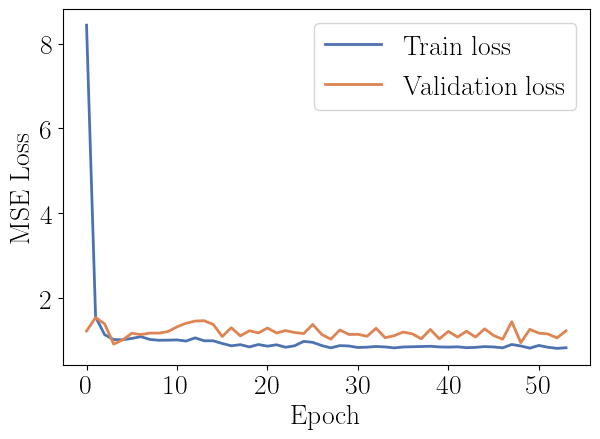

In [44]:
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.8829, R2: 0.4130
Validation Loss: 0.9165, R2: 0.3831
Test Loss: 0.8496, R2: 0.3521


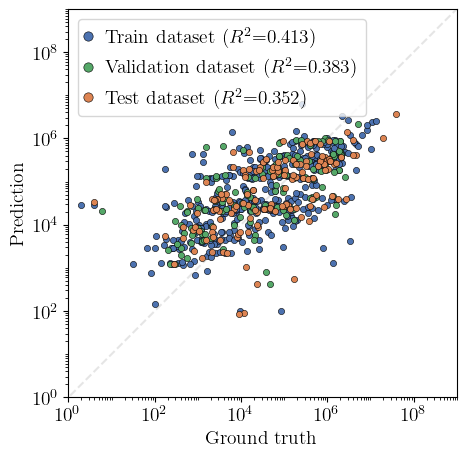

In [45]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9)

### Permutation feature importance

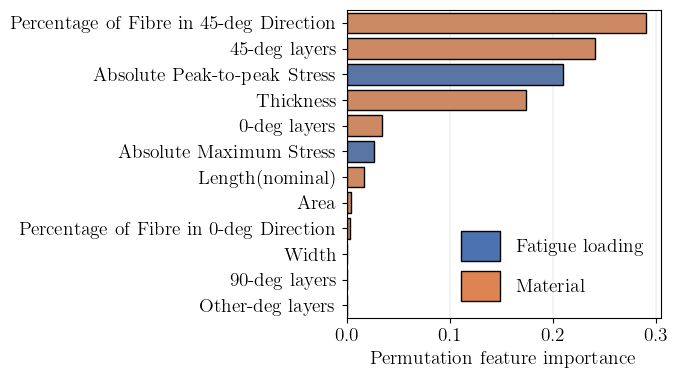

In [46]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Width
Calculate PDP:  Area
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Length(nominal)
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  0-deg layers
Calculate PDP:  45-deg layers
Calculate PDP:  90-deg layers
Calculate PDP:  Other-deg layers


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/hdd/ML-fracture/src/utils.py:349: UserWarning: Attempting to set identical left == right == -0.029456820338964462 results in singular transformations; automatically expanding.
  ax2.set_xlim([np.min(x_values_list[idx]), np.max(x_values_list[idx])])
/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin

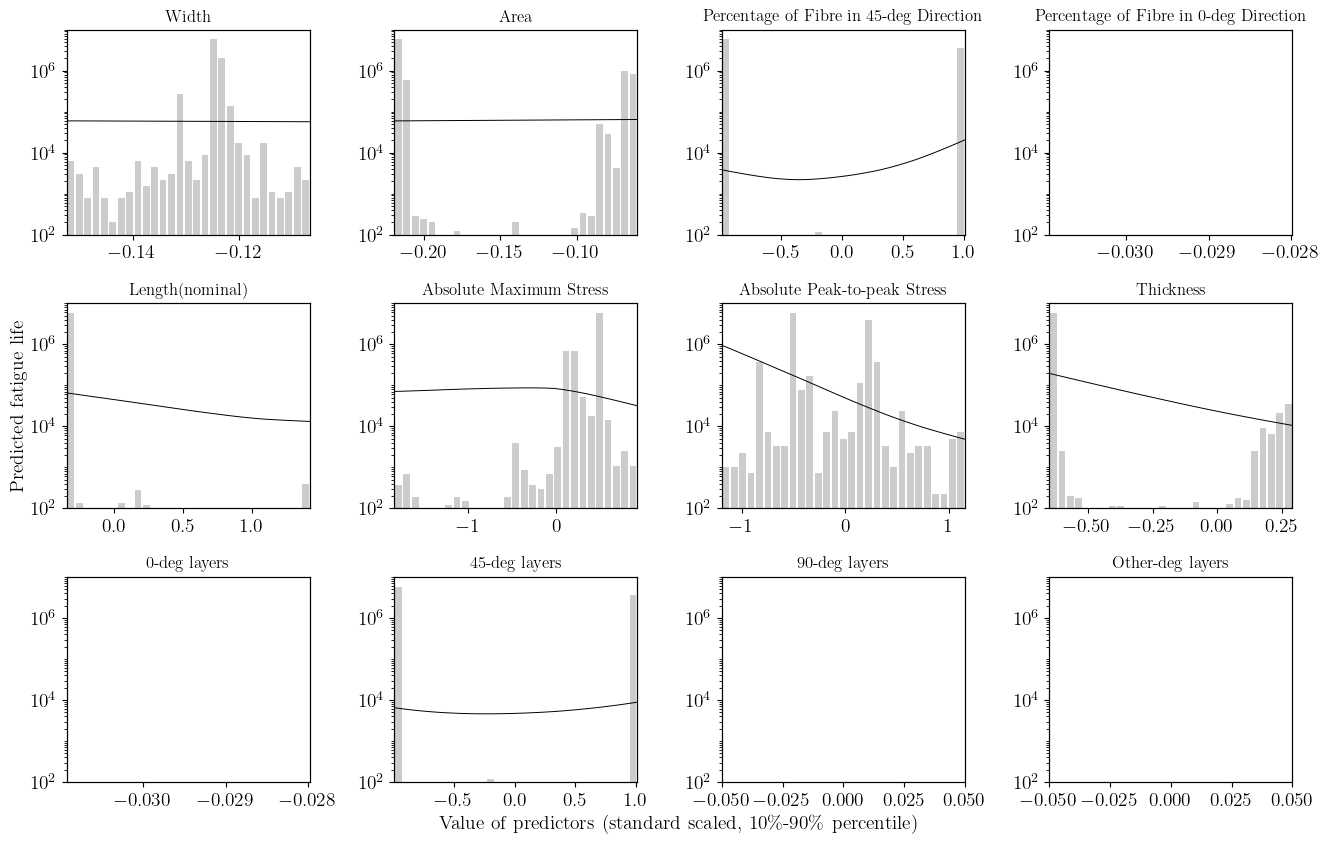

In [47]:
trainer.plot_partial_dependence(log_trans=True, lower_lim=2, upper_lim=7)

/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


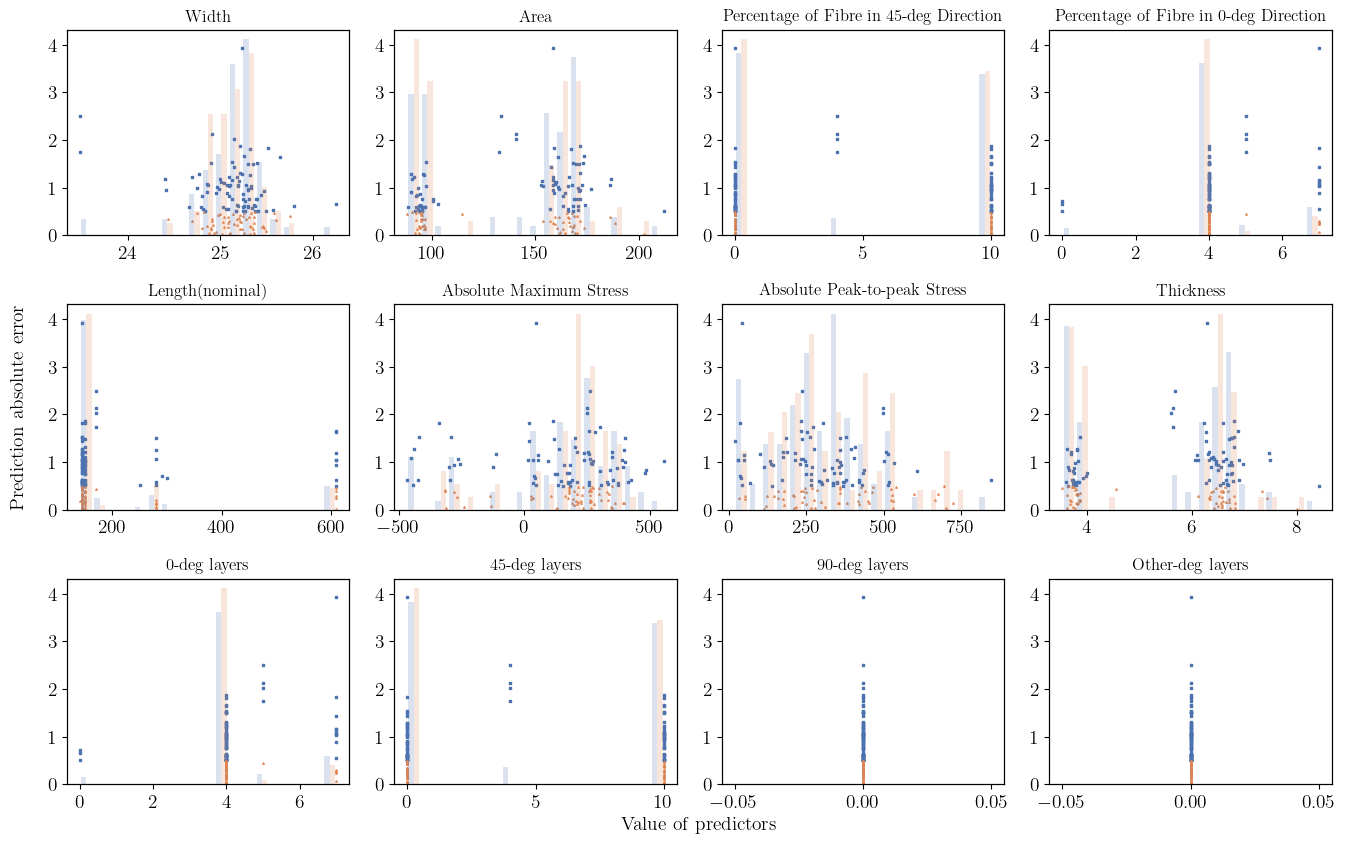

In [48]:
trainer.plot_partial_err(0.5)

## Baseline models

In [49]:
trainer.get_leaderboard(test_data_only=False)

Pytorch-Tabular metrics
AutoGluon metrics
This work metrics
TabNet metrics


,Program,Model,Train RMSE,Train MSE,Train MAE,Train MAPE,Train R2,Test RMSE,Test MSE,Test MAE,Test MAPE,Test R2,Validation RMSE,Validation MSE,Validation MAE,Validation MAPE,Validation R2
0,AutoGluon,WeightedEnsemble_L2,0.215314,0.046360,0.156684,0.048745,0.969180,0.679334,0.461495,0.496032,0.140996,0.648107,0.707235,0.500181,0.518907,0.157593,0.663352
1,AutoGluon,ExtraTreesMSE_BAG_L1/T0,0.302843,0.091714,0.217306,0.068719,0.939029,0.687006,0.471977,0.500347,0.142663,0.640114,0.714077,0.509906,0.528614,0.160423,0.656806
2,AutoGluon,KNeighborsDist_BAG_L1/T0,0.000000,0.000000,0.000000,0.000000,1.000000,0.711186,0.505785,0.509749,0.142652,0.614335,0.737503,0.543911,0.545609,0.162734,0.633919
3,AutoGluon,RandomForestMSE_BAG_L1/T0,0.311947,0.097311,0.229089,0.071578,0.935308,0.716940,0.514003,0.551910,0.153998,0.608069,0.766498,0.587520,0.566769,0.172947,0.604568
4,AutoGluon,LightGBMLarge_BAG_L1,0.444641,0.197706,0.327238,0.107603,0.868566,0.727079,0.528644,0.563982,0.158348,0.596905,0.800976,0.641562,0.607255,0.186243,0.568195
5,AutoGluon,CatBoost_BAG_L1/T0,0.594367,0.353272,0.456014,0.143766,0.765147,0.736047,0.541765,0.566528,0.162633,0.586900,0.785181,0.616509,0.601116,0.181882,0.585057
6,AutoGluon,XGBoost_BAG_L1/T0,0.409387,0.167597,0.311884,0.087445,0.888582,0.764301,0.584156,0.591948,0.161536,0.554577,0.765803,0.586454,0.575898,0.170568,0.605286
7,Pytorch-Tabular,TabTransformerModel,0.701767,0.492477,0.507518,0.163257,0.672604,0.782787,0.612755,0.556498,0.161720,0.532769,0.769518,0.592159,0.561826,0.161039,0.601446
8,AutoGluon,LightGBM_BAG_L1/T0,0.704575,0.496426,0.519809,0.167001,0.669979,0.788154,0.621186,0.600797,0.173310,0.526341,0.849460,0.721581,0.652958,0.199950,0.514338
9,AutoGluon,LightGBMXT_BAG_L1/T0,0.806146,0.649872,0.599840,0.191146,0.567969,0.790540,0.624954,0.603053,0.175802,0.523468,0.865364,0.748855,0.668179,0.200100,0.495981


In [50]:
trainer.plot_truth_pred(program='pytorch_tabular', upper_lim=9)

Making baseline predictions...
TabTransformerModel 1/4
TabNetModel 2/4
CategoryEmbeddingModel 3/4
AutoIntModel 4/4
Plotting...
TabTransformerModel 1/4
Train Loss: 0.4925, R2: 0.6726
Validation Loss: 0.5922, R2: 0.6014
Test Loss: 0.6128, R2: 0.5328
TabNetModel 2/4
Train Loss: 0.7947, R2: 0.4717
Validation Loss: 0.8220, R2: 0.4468
Test Loss: 0.6594, R2: 0.4972
CategoryEmbeddingModel 3/4
Train Loss: 0.6743, R2: 0.5517
Validation Loss: 0.7915, R2: 0.4673
Test Loss: 0.6666, R2: 0.4917
AutoIntModel 4/4
Train Loss: 2.2159, R2: -0.4731
Validation Loss: 1.2889, R2: 0.1325
Test Loss: 1.2228, R2: 0.0676


In [51]:
trainer.plot_truth_pred(program='autogluon', upper_lim=9)

Making baseline predictions...
WeightedEnsemble_L2 1/12
ExtraTreesMSE_BAG_L1/T0 2/12
KNeighborsDist_BAG_L1/T0 3/12
RandomForestMSE_BAG_L1/T0 4/12
LightGBMLarge_BAG_L1 5/12
CatBoost_BAG_L1/T0 6/12
XGBoost_BAG_L1/T0 7/12
LightGBM_BAG_L1/T0 8/12
LightGBMXT_BAG_L1/T0 9/12
NeuralNetFastAI_BAG_L1/T0 10/12
KNeighborsUnif_BAG_L1/T0 11/12
NeuralNetMXNet_BAG_L1/T0 12/12
Plotting...
WeightedEnsemble_L2 1/12
Train Loss: 0.0464, R2: 0.9692
Validation Loss: 0.5002, R2: 0.6634
Test Loss: 0.4615, R2: 0.6481
ExtraTreesMSE_BAG_L1/T0 2/12
Train Loss: 0.0917, R2: 0.9390
Validation Loss: 0.5099, R2: 0.6568
Test Loss: 0.4720, R2: 0.6401
KNeighborsDist_BAG_L1/T0 3/12
Train Loss: 0.0000, R2: 1.0000
Validation Loss: 0.5439, R2: 0.6339
Test Loss: 0.5058, R2: 0.6143
RandomForestMSE_BAG_L1/T0 4/12
Train Loss: 0.0973, R2: 0.9353
Validation Loss: 0.5875, R2: 0.6046
Test Loss: 0.5140, R2: 0.6081
LightGBMLarge_BAG_L1 5/12
Train Loss: 0.1977, R2: 0.8686
Validation Loss: 0.6416, R2: 0.5682
Test Loss: 0.5286, R2: 0.5969